In [3]:
#Import necessary packages
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [5]:
# Goals for this project are:
#     - Analyzing Life Expectancy per GDP.
#     - Different countries' rate of growth in GDP

In [17]:
# Load data into Dataframe
df = pd.read_csv('all_data.csv')
print(df.head())

# Rename Dataframe Columns
df.columns = ['country', 'year', 'life_expectancy', 'gdp']

# Find out how many rows and columns
print(df.shape)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
(96, 4)


In [38]:
# Run covariance and correlation tests to see if there's association between life expectancy and GDP
covariance_gdp_expectancy = np.cov(df.life_expectancy, df.gdp)[0][1]
correlation_gdp_expectancy = pearsonr(df.life_expectancy, df.gdp)
print(correlation_gdp_expectancy)

# From the covariance and correlation results, we can assume there is a slight association between the variables. 
# This is probably due to the fact that the GDP is not weighted, meaning it is not per capita. If it was, we can assume the linear relationship would be much stronger, since countries like Germany and Chile (which have relatively small populations) would have a higher GDP per capita.


(0.343206748449156, 0.0006187129569469811)


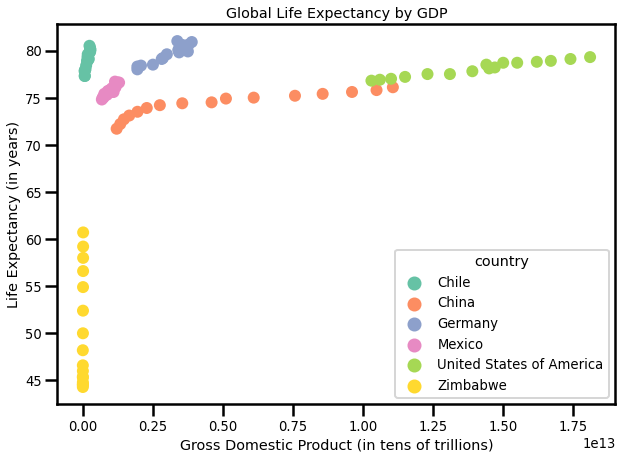

In [70]:
# To better visualize it, let's make a scatter plot.

plt.figure(figsize=[10, 7])
sns.set_context('poster', font_scale=0.6)
sns.set_palette('Set2')

sns.scatterplot(y='life_expectancy', x='gdp', hue='country', data=df, linewidth=0)

plt.title('Global Life Expectancy by GDP')
plt.xlabel('Gross Domestic Product (in tens of trillions)')
plt.ylabel('Life Expectancy (in years)')

plt.show()

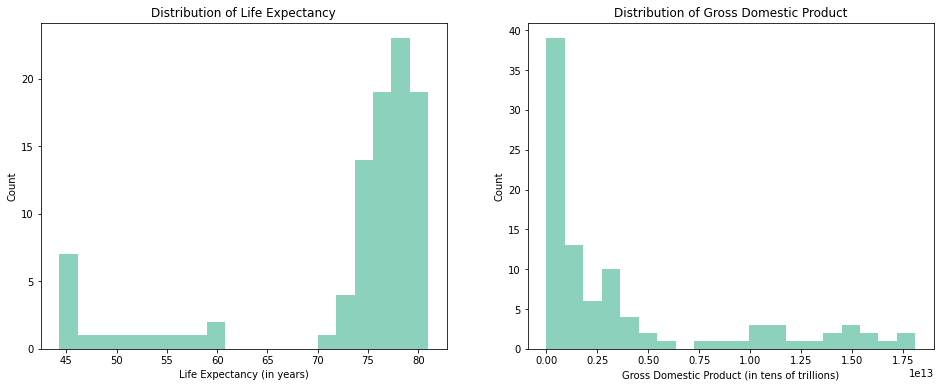

In [44]:
# Now, let's make a histogram to see the distribution, the median, and the interquartile range for each variable.

plt.figure(figsize=[16, 6])
sns.set_palette('Set2')

#Life expectancy Subplot

plt.subplot(1, 2, 1)
sns.histplot(x='life_expectancy', data=df, linewidth=0, bins=20)

plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (in years)')

#GDP Subplot

plt.subplot(1, 2, 2)
sns.histplot(x='gdp', data=df, linewidth=0, bins=20)

plt.title('Distribution of Gross Domestic Product')
plt.xlabel('Gross Domestic Product (in tens of trillions)')

plt.show()

In [ ]:
# As we can see, the life expectancy is very left skewed, and the GDP is strongly right skewed. 
# They are also both unimodal.


In [45]:
# Let's check which the min and max values are for each variable, and which country and year they are

# Get min and max GDP
min_gdp = np.min(df.gdp)
max_gdp = np.max(df.gdp)

# Get min and max life expectancy
min_life_expectancy = np.min(df.life_expectancy)
max_life_expectancy = np.max(df.life_expectancy)

# Select rows where GDP is the min or the max
min_gdp_row = df[(df.gdp == min_gdp)]
max_gdp_row = df[(df.gdp == max_gdp)]

# Select rows where life expectancy is the min or the max
min_life_expectancy_row = df[(df.life_expectancy == min_life_expectancy)]
max_life_expectancy_row = df[(df.life_expectancy == max_life_expectancy)]

print(min_gdp_row, max_gdp_row)
print('\n')
print(min_life_expectancy_row, max_life_expectancy_row)

     country  year  life_expectancy           gdp
88  Zimbabwe  2008             48.2  4.415703e+09                      country  year  life_expectancy           gdp
79  United States of America  2015             79.3  1.810000e+13


     country  year  life_expectancy           gdp
84  Zimbabwe  2004             44.3  5.805598e+09     country  year  life_expectancy           gdp
47  Germany  2015             81.0  3.375610e+12


In [ ]:
# We can see the lowest GDP was Zimbabwe in 2008, and the highest was the USA in 2015.
# The lowest life expectancy was Zimbabwe in 2004, and the highest was Germany in 2015.

In [67]:
# Now, we're going to plot every countries GDP per year

plt.figure(figsize=[12, 8])
i = 0

for country in df.country.unique():
    i = i + 1
    ax = plt.subplot(2, 3, i)
    plt.plot(df.year[df.country == country], df.gdp[df.country == country])
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.title('GDP per Year of ' + country)
    # ax.get_offset_text() to be continued 

plt.tight_layout()
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'get_offset_text'